# 課題

1. 線形補間を用いた画像サイズを変更するプログラムを作成せよ．

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

def bi_linear_interpolate(img: np.ndarray, ax: float=1.5, ay: float=1.5):
	H, W, C = img.shape

	aH = int(ay * H)
	aW = int(ax * W)

	y = np.repeat(np.arange(aH) / ay, aW)
	x = np.tile(np.arange(aW) / ax, aH)

	# y軸、x軸の元画像インデックス（左上）
	y_index = np.floor(y).astype(np.uint8)
	x_index = np.floor(x).astype(np.uint8)

	# 最終行or最終列の場合、(x+1,y), (x, y+1),（x+1, y+1)は存在しない
	y_index[y_index >= H-1] = H-2
	x_index[x_index >= W-1] = W-2
 
	# 左上インデックスとの距離
	# ブロードキャストのため2次元配列に変換
	y_dist = (y - y_index).reshape(aH*aW, 1)
	x_dist = (x - x_index).reshape(aH*aW, 1)

	# ファンシーインデックスで選択
	out = (1 - x_dist) * (1 - y_dist) * img[y_index, x_index, :] \
    	+ x_dist * (1 - y_dist) * img[y_index, x_index + 1, :] \
        + (1 - x_dist) * y_dist * img[y_index + 1, x_index, :] \
        + x_dist * y_dist * img[y_index + 1, x_index + 1, :]

	out = out.reshape([aH, aW, -1])
	out = np.clip(out, 0, 255).astype(np.uint8)

	return out



2. 画像（./imgs/3x3.png）を2，3，4倍に拡大した結果を示せ．

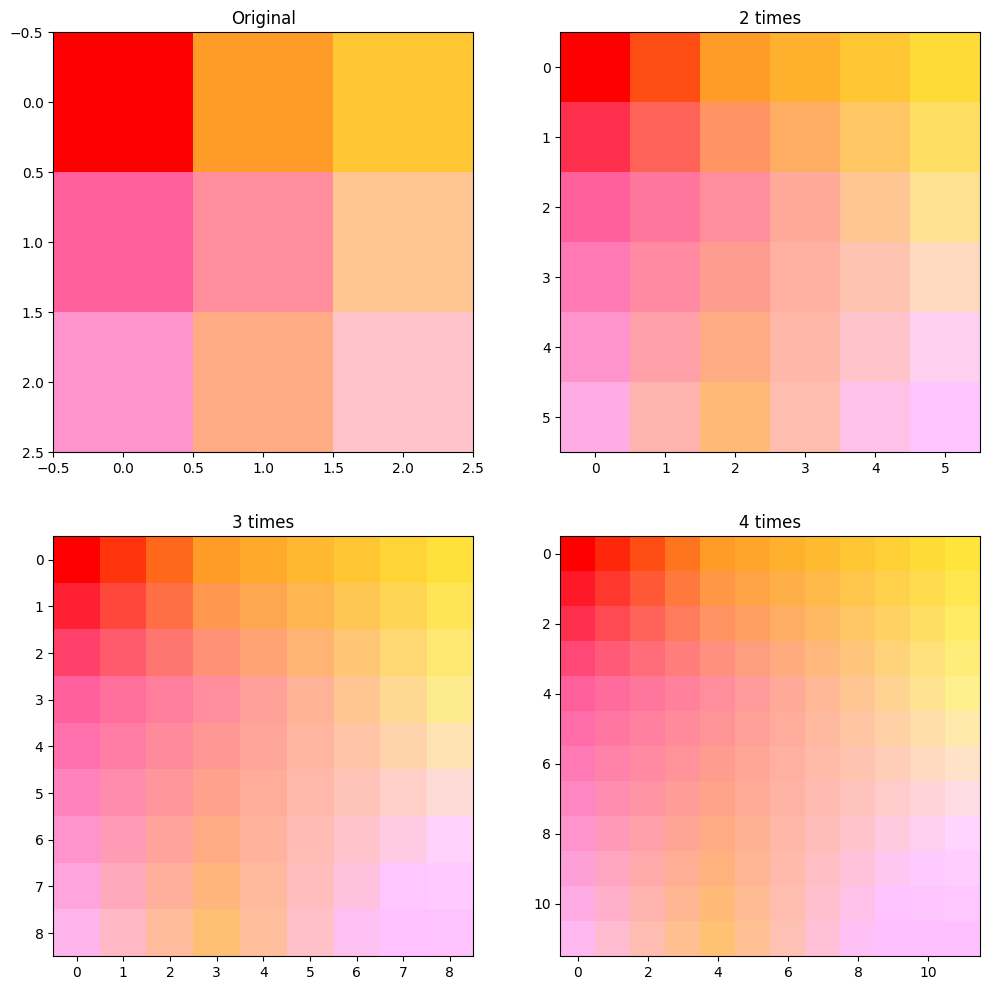

In [3]:
plt.figure(figsize=(12, 12))

img = io.imread("imgs/3x3.png")
plt.subplot(2, 2, 1)
plt.title('Original')
plt.imshow(img)

img_2 = bi_linear_interpolate(img, ax=2, ay=2)
plt.subplot(2, 2, 2)
plt.title('2 times')
plt.imshow(img_2)

img_3 = bi_linear_interpolate(img, ax=3, ay=3)
plt.subplot(2, 2, 3)
plt.title('3 times')
plt.imshow(img_3)

img_4 = bi_linear_interpolate(img, ax=4, ay=4)
plt.subplot(2, 2, 4)
plt.title('4 times')
plt.imshow(img_4)


3. 画像を1/2，1/3，1/4倍した結果を示せ．

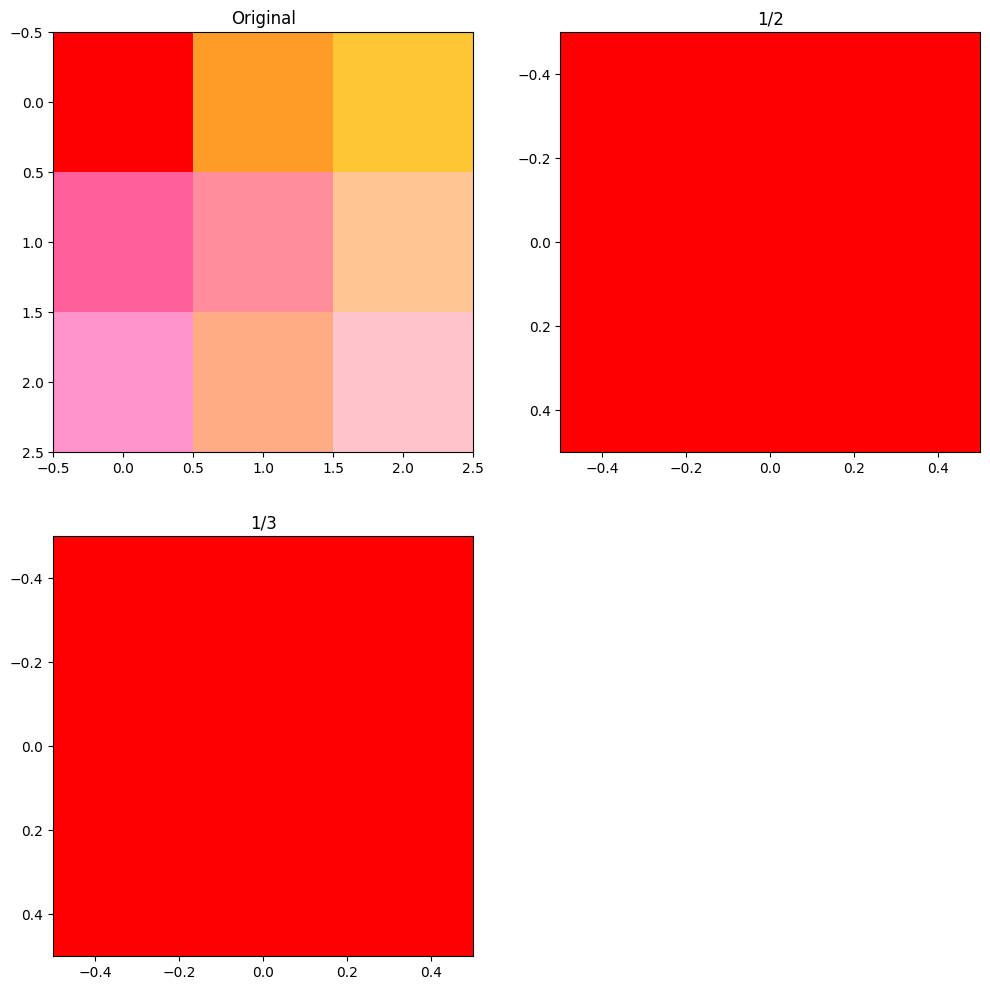

In [4]:
plt.figure(figsize=(12, 12))

img = io.imread("imgs/3x3.png")
plt.subplot(2, 2, 1)
plt.title('Original')
plt.imshow(img)

img_2 = bi_linear_interpolate(img, ax=1/2, ay=1/2)
plt.subplot(2, 2, 2)
plt.title('1/2')
plt.imshow(img_2)

img_3 = bi_linear_interpolate(img, ax=1/3, ay=1/3)
plt.subplot(2, 2, 3)
plt.title('1/3')
plt.imshow(img_3)

In [5]:
img_4 = bi_linear_interpolate(img, ax=1/4, ay=1/4)
plt.subplot(2, 2, 4)
plt.title('1/4')
plt.imshow(img_4)

ValueError: cannot reshape array of size 0 into shape (0,0,newaxis)